In [114]:
#importing all the modules required

import pandas as pd
import scipy.stats as st
import statsmodels.formula.api as smf
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sys
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

print(sns.__version__)  
print(matplotlib.__version__)

#read the csv we will be analysing
diabetes_data = pd.read_csv("PimaDiabetes (3).csv")

print(diabetes_data.head())


0.12.2
3.7.2
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigree  Age  Outcome  
0             0.627   50        1  
1             0.351   31        0  
2             0.672   32        1  
3             0.167   21        0  
4             2.288   33        1  


In [87]:
diabetes_data["Outcome"].value_counts()

Outcome
0    490
1    260
Name: count, dtype: int64

In [88]:
diabetes_data.shape

(750, 9)

In [89]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pregnancies       750 non-null    int64  
 1   Glucose           750 non-null    int64  
 2   BloodPressure     750 non-null    int64  
 3   SkinThickness     750 non-null    int64  
 4   Insulin           750 non-null    int64  
 5   BMI               750 non-null    float64
 6   DiabetesPedigree  750 non-null    float64
 7   Age               750 non-null    int64  
 8   Outcome           750 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.9 KB


In [90]:
# Assuming 'diabetes_data' is your DataFrame
zero_counts = (diabetes_data == 0).sum()

print("Count of zeros in each column:")
print(zero_counts)

Count of zeros in each column:
Pregnancies         109
Glucose               5
BloodPressure        35
SkinThickness       221
Insulin             362
BMI                  11
DiabetesPedigree      0
Age                   0
Outcome             490
dtype: int64


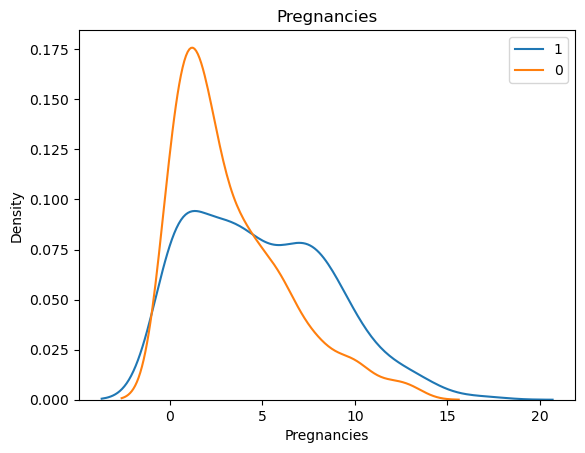

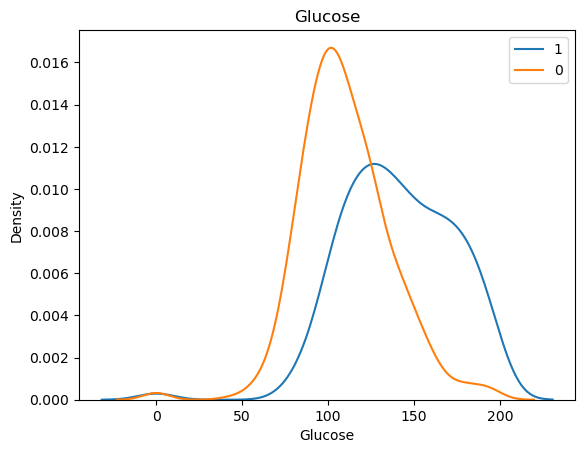

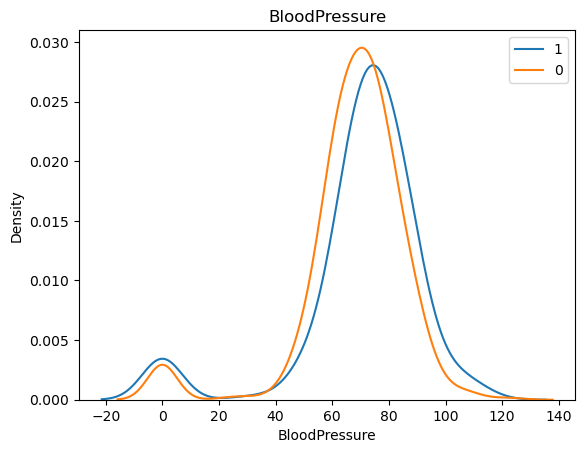

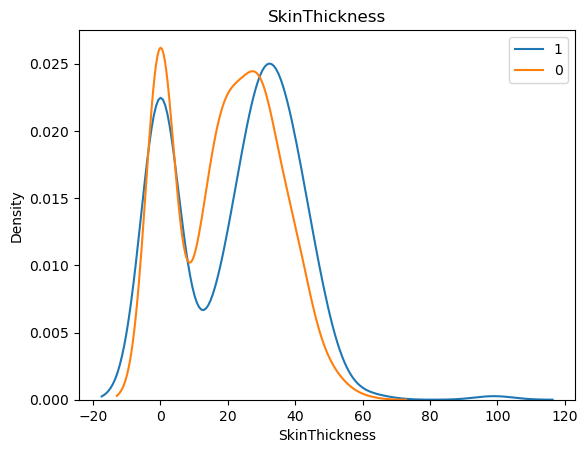

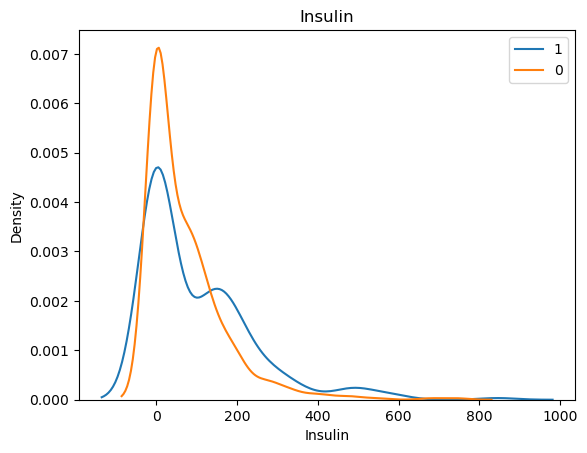

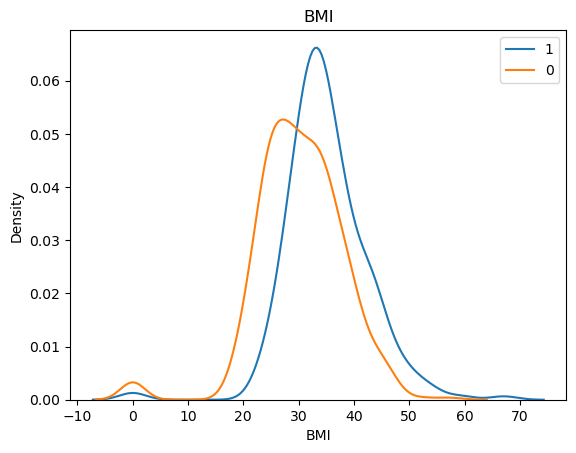

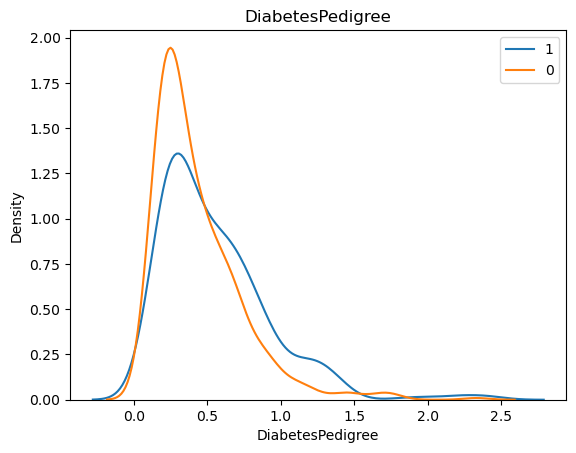

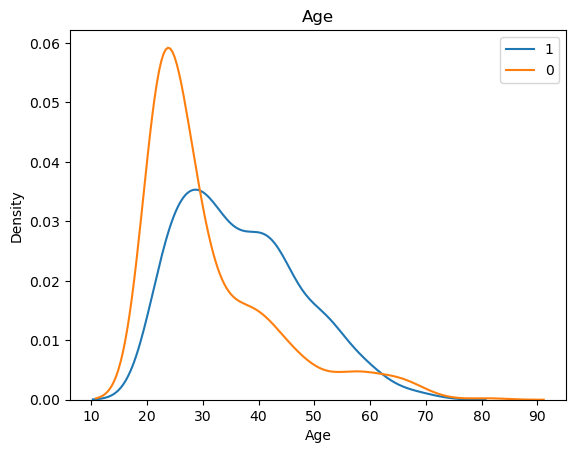

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'class_column' is the name of the column with class labels
class_column = 'Outcome'  # Replace 'YourClassColumnName' with the actual name of your class column
data_columns = diabetes_data.columns.drop(class_column)  # Exclude the class column from the columns to plot

for column in data_columns:
    plt.figure()
    # Loop through each class to plot its KDE separately
    for class_label in diabetes_data[class_column].unique():
        subset = diabetes_data[diabetes_data[class_column] == class_label]
        sns.kdeplot(subset[column], label=str(class_label))
    plt.title(column)
    plt.legend()
    plt.show()


In [92]:
#checking for skewness of the datas
skewness = diabetes_data['DiabetesPedigree'].skew()
print("Skewness of pedigree: ", skewness)

skewness = diabetes_data['Pregnancies'].skew()
print("Skewness of pregnancies: ", skewness)

skewness = diabetes_data['Age'].skew()
print("Skewness of age: ", skewness)


skewness = diabetes_data['Insulin'].skew()
print("Skewness of insulin: ", skewness)

Skewness of pedigree:  1.9216379205522764
Skewness of pregnancies:  0.9106390203861443
Skewness of age:  1.1345801481409807
Skewness of insulin:  2.2601366096358926


In [93]:
diabetes_data = diabetes_data.drop(['SkinThickness', 'Insulin'], axis=1)

In [94]:

# Define the columns with 0 values that you want to impute (excluding 'Pregnancies')


columns_to_impute = ['BloodPressure', 'BMI', "Glucose"]

# Replace 0 values with the mean of the respective column for selected columns
for column_name in columns_to_impute:
    diabetes_data[column_name].replace(0, diabetes_data[diabetes_data[column_name] != 0][column_name].mean(), inplace=True)


# Set the display option to show all columns
pd.set_option("display.max_columns", None)

In [95]:

#describing the dataset (min,max, mean etc)
print(diabetes_data.describe())

       Pregnancies     Glucose  BloodPressure         BMI  DiabetesPedigree  \
count   750.000000  750.000000     750.000000  750.000000        750.000000   
mean      3.844000  121.547651      72.359441   32.434777          0.473544   
std       3.370085   30.451488      12.138532    6.900732          0.332119   
min       0.000000   44.000000      24.000000   18.200000          0.078000   
25%       1.000000   99.000000      64.000000   27.500000          0.244000   
50%       3.000000  117.000000      72.179720   32.400000          0.377000   
75%       6.000000  140.750000      80.000000   36.575000          0.628500   
max      17.000000  199.000000     122.000000   67.100000          2.420000   

              Age     Outcome  
count  750.000000  750.000000  
mean    33.166667    0.346667  
std     11.708872    0.476226  
min     21.000000    0.000000  
25%     24.000000    0.000000  
50%     29.000000    0.000000  
75%     40.750000    1.000000  
max     81.000000    1.000000  


In [96]:
#standardise the data

from sklearn.preprocessing import StandardScaler

# Assuming 'diabetes_data' is your DataFrame
columns_to_standardize = ["DiabetesPedigree", "Pregnancies", "Age"]

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize each of the specified columns
for column in columns_to_standardize:
    # Convert the pandas Series to a NumPy array and reshape it for standardization
    data_reshaped = diabetes_data[column].values.reshape(-1, 1)  # or use diabetes_data[column].to_numpy().reshape(-1, 1)
    
    # Standardize the data
    diabetes_data[column] = scaler.fit_transform(data_reshaped)

# Now 'DiabetesPedigreeFunction', 'Pregnancies', and 'Age' are standardized in your DataFrame


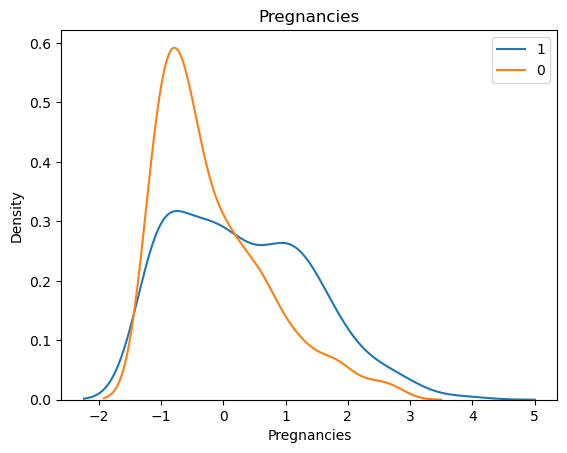

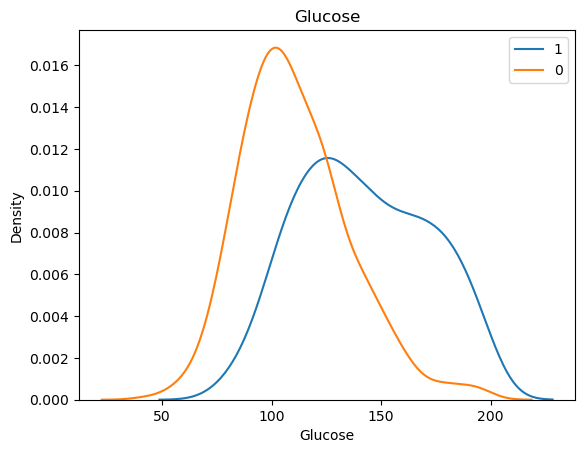

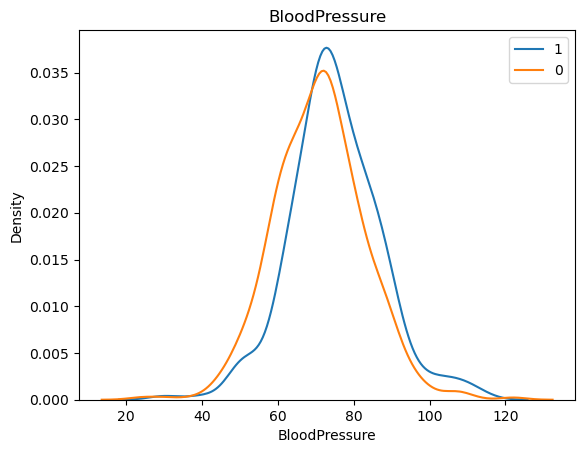

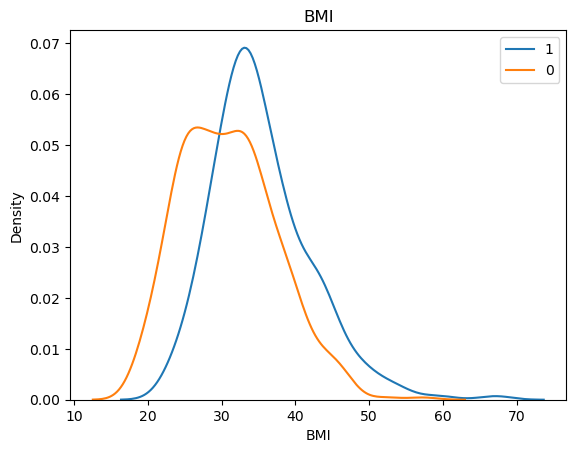

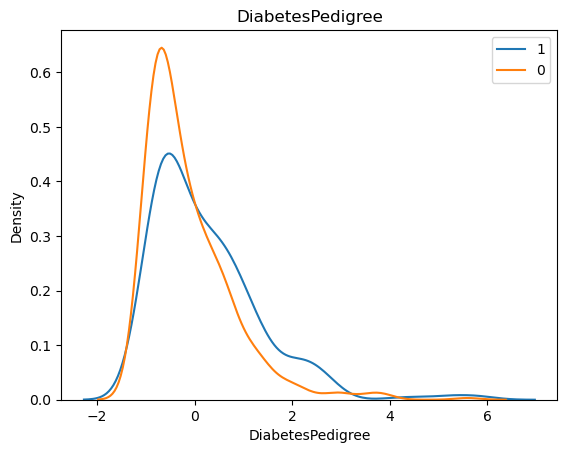

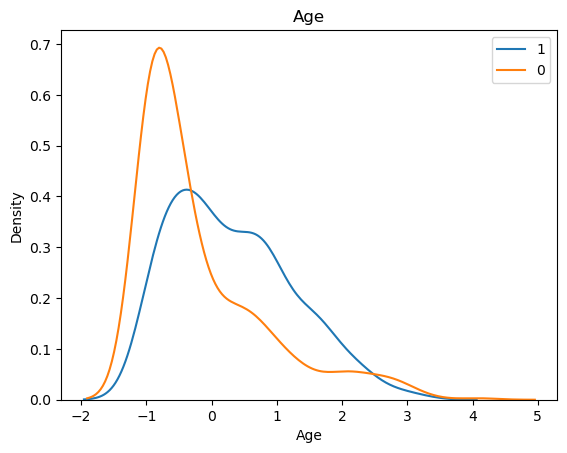

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and 'class_column' is the name of the column with class labels
class_column = 'Outcome'  # Replace 'YourClassColumnName' with the actual name of your class column
data_columns = diabetes_data.columns.drop(class_column)  # Exclude the class column from the columns to plot

for column in data_columns:
    plt.figure()
    # Loop through each class to plot its KDE separately
    for class_label in diabetes_data[class_column].unique():
        subset = diabetes_data[diabetes_data[class_column] == class_label]
        sns.kdeplot(subset[column], label=str(class_label))
    plt.title(column)
    plt.legend()
    plt.show()


                  Pregnancies   Glucose  BloodPressure       BMI  \
Pregnancies          1.000000  0.128013       0.211142  0.026307   
Glucose              0.128013  1.000000       0.209368  0.223277   
BloodPressure        0.211142  0.209368       1.000000  0.276142   
BMI                  0.026307  0.223277       0.276142  1.000000   
DiabetesPedigree    -0.031085  0.140103      -0.002406  0.156821   
Age                  0.547124  0.262784       0.323672  0.021889   
Outcome              0.229235  0.486999       0.162434  0.309057   

                  DiabetesPedigree       Age   Outcome  
Pregnancies              -0.031085  0.547124  0.229235  
Glucose                   0.140103  0.262784  0.486999  
BloodPressure            -0.002406  0.323672  0.162434  
BMI                       0.156821  0.021889  0.309057  
DiabetesPedigree          1.000000  0.041807  0.170688  
Age                       0.041807  1.000000  0.232892  
Outcome                   0.170688  0.232892  1.000000  

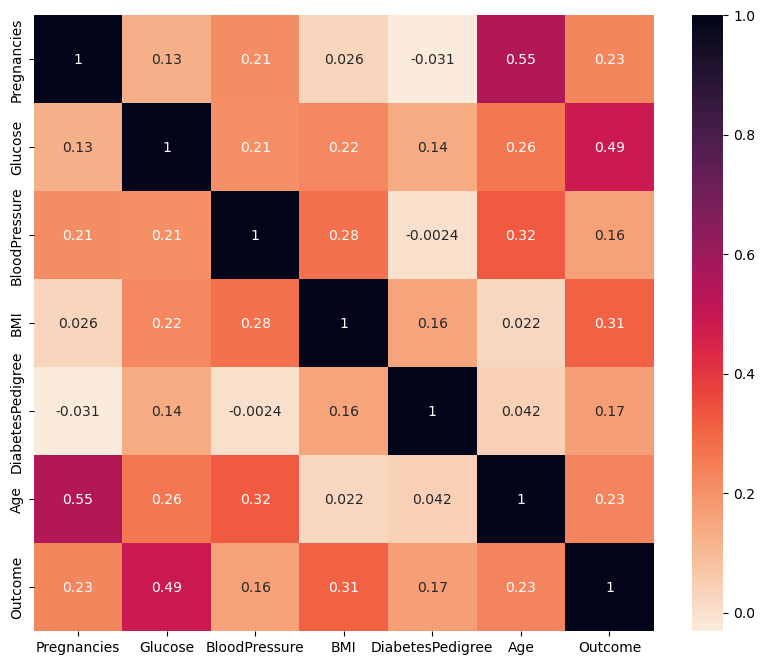

In [98]:

#heatmap for correlation coefficients
# we can see that the glucose and outcome correlation is very high. According to the literature, something about glucose and diabetes so it makes sense that this is a strong correlated predictor
correlation_matrix = diabetes_data.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="rocket_r") 
plt.show()

#it doesnt seem that there is multicollinearity for these correlation coefficients

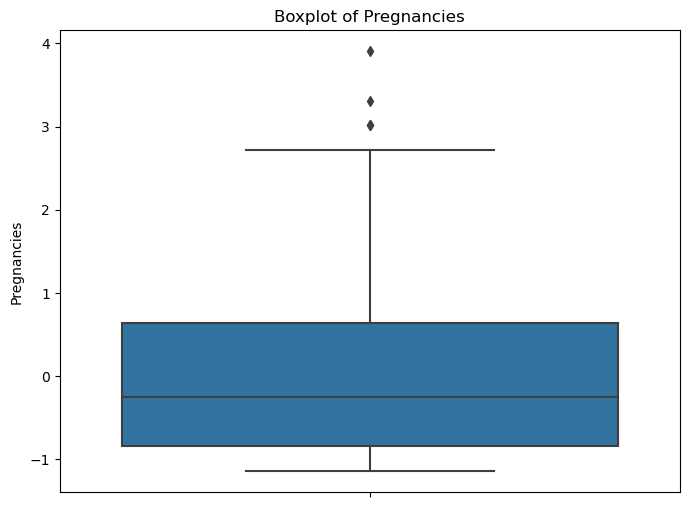

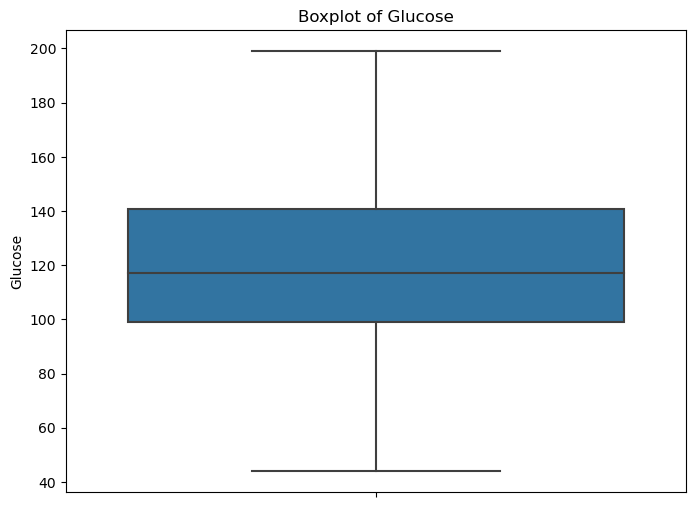

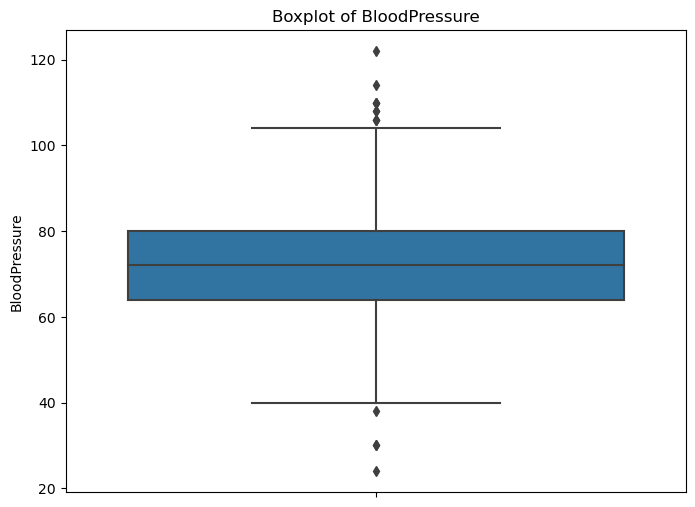

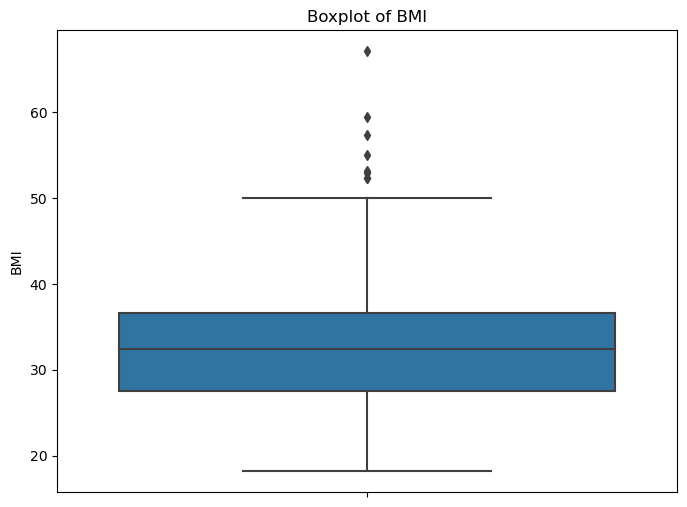

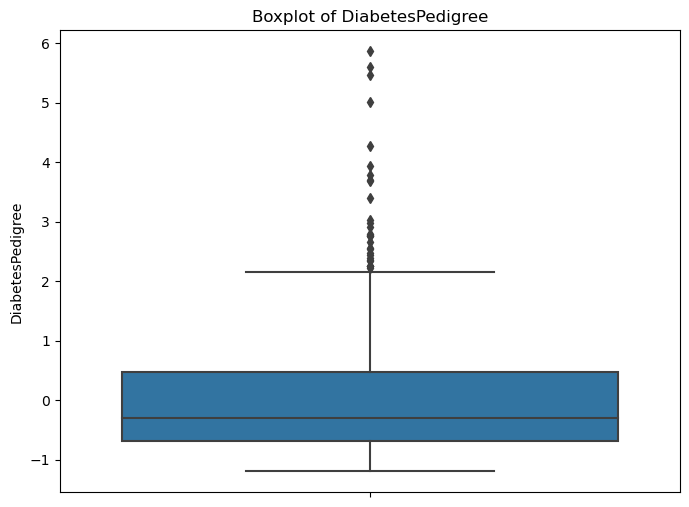

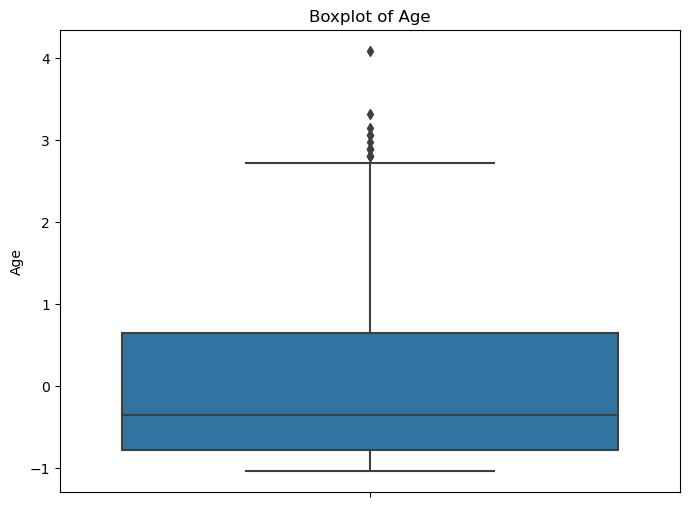

In [99]:

#we want to see what features we should select to include in our final prediction
#to do this, i have decided to use boxplots and also p values
#now we should also create boxplots to visualise these findings

# Assuming 'diabetes_data' is your DataFrame
for column in diabetes_data.columns[:-1]:  # Exclude 'Outcome' from the univariate plots
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=diabetes_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [100]:
import numpy as np
import pandas as pd

# Assuming 'diabetes_data' is a pandas DataFrame with numerical columns
# Note: Replace 'diabetes_data' with 'vertebral_data' as per your example description if needed

# Function to filter outliers using IQR (Interquartile Range) method, inspired by boxplot statistics
def filter_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Assuming 'diabetes_data' is your DataFrame, if it's 'vertebral_data', just replace the variable name accordingly.
numerical_cols = diabetes_data.select_dtypes(include=[np.number]).columns

# Apply the filter to each numerical column in the DataFrame
filtered_data_iqr = diabetes_data.copy()  # Create a copy to preserve the original data
for column in numerical_cols:
    filtered_data_iqr[column] = filter_outliers_iqr(diabetes_data[column])

# Note: The resulting DataFrame 'filtered_data_iqr' will have NaNs for removed outliers.
# To drop rows with any NaNs resulting from the outlier removal:
diabetes_data = filtered_data_iqr.dropna()

# cleaned_data now has outliers removed based on the IQR method.
print(diabetes_data.head())  # Display the first few rows of the cleaned data.


   Pregnancies  Glucose  BloodPressure   BMI  DiabetesPedigree       Age  \
0     0.640173    148.0           72.0  33.6          0.462359  1.438616   
1    -0.844459     85.0           66.0  26.6         -0.369222 -0.185168   
2     1.234026    183.0           64.0  23.3          0.597943 -0.099706   
3    -0.844459     89.0           66.0  28.1         -0.923609 -1.039792   
5     0.343247    116.0           74.0  25.6         -0.821168 -0.270631   

   Outcome  
0        1  
1        0  
2        1  
3        0  
5        0  


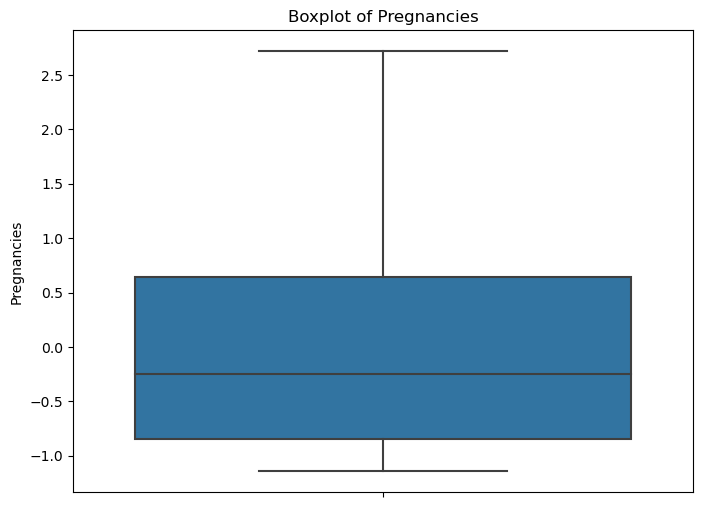

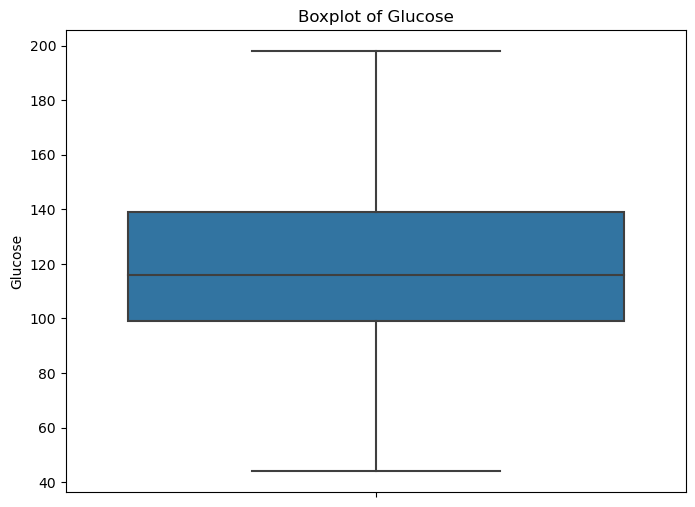

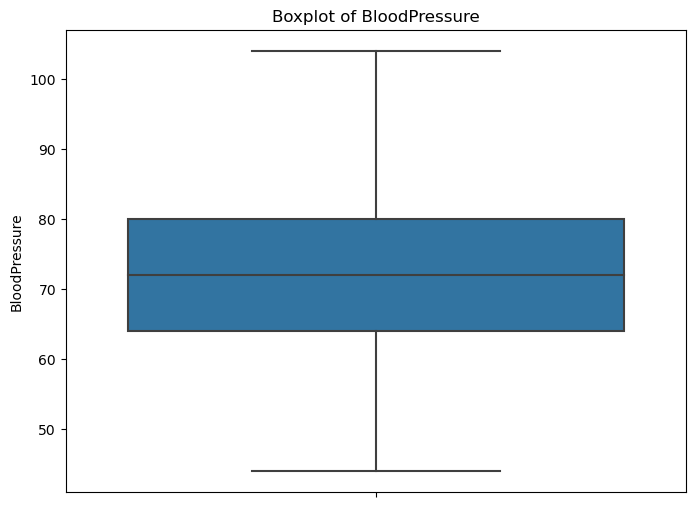

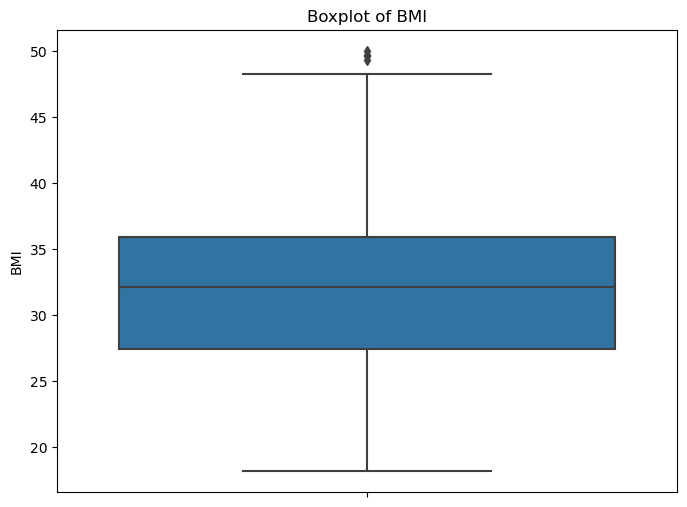

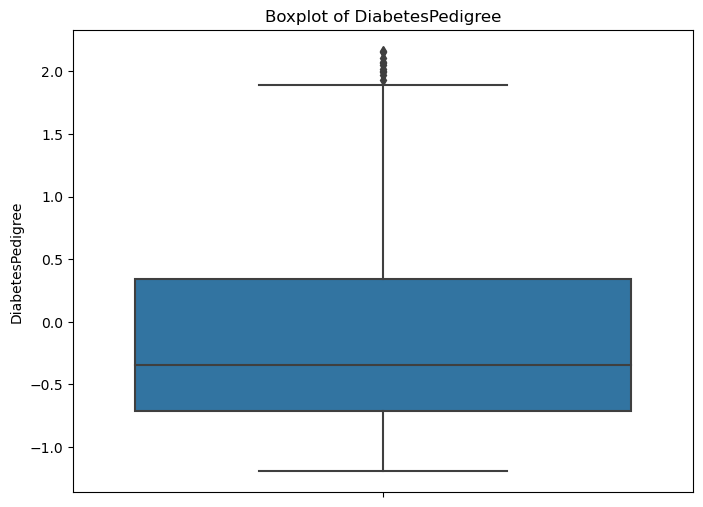

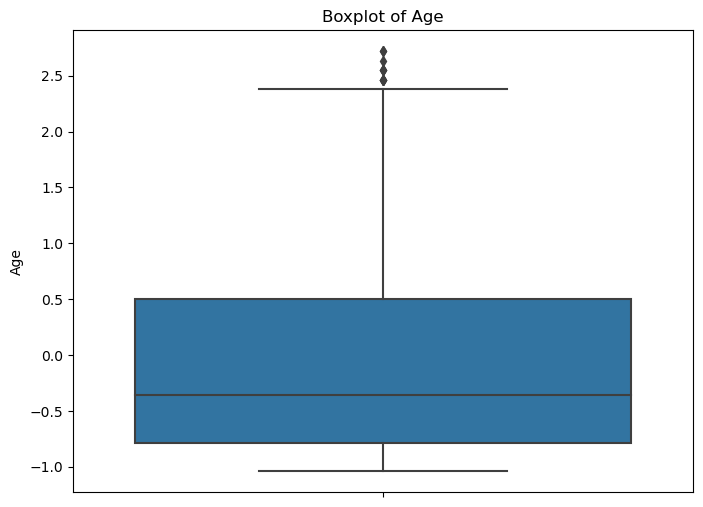

In [101]:
# Assuming 'diabetes_data' is your DataFrame
for column in diabetes_data.columns[:-1]:  # Exclude 'Outcome' from the univariate plots
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=diabetes_data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [102]:
#create a logisitic regression model to predict outcome

X = diabetes_data.drop("Outcome", axis=1) 

y = diabetes_data["Outcome"]


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [104]:
#cross validation



# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence

# Assuming X_training and y_training are your features and target variable for training
# Perform 5-fold cross-validation and compute the accuracy
scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy scores for each fold:", scores)

# Print the mean and standard deviation of the scores
print("Mean accuracy: {:.2f}".format(scores.mean()))
print("Standard deviation: {:.2f}".format(scores.std()))


Accuracy scores for each fold: [0.80582524 0.76699029 0.75728155 0.74757282 0.79411765]
Mean accuracy: 0.77
Standard deviation: 0.02


In [105]:
model = LogisticRegression(max_iter=1000)  # Using GaussianNB as an example
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [106]:
predictions = model.predict(X_test)

In [107]:
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.7732558139534884
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       116
           1       0.71      0.52      0.60        56

    accuracy                           0.77       172
   macro avg       0.75      0.71      0.72       172
weighted avg       0.77      0.77      0.76       172



In [108]:

#hyperparameter tuning

# Define the parameter grid to search
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Creates 20 values between 10^-4 and 10^4
    'penalty': ['l1', 'l2'],  # Norms used for regularization
    # 'solver': ['liblinear']  # Good choice for small datasets and when using l1 penalty
}

# Initialize the Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit it to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Optionally, use the best estimator to make predictions
best_log_reg = grid_search.best_estimator_
predictions = best_log_reg.predict(X_test)

# Evaluate the predictions
print("Test set accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))


Best parameters: {'C': 0.0018329807108324356, 'penalty': 'l2'}
Best score: 0.7802017894536455
Test set accuracy: 0.7674418604651163
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       116
           1       0.72      0.46      0.57        56

    accuracy                           0.77       172
   macro avg       0.75      0.69      0.70       172
weighted avg       0.76      0.77      0.75       172



c:\Users\jackk\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jackk\Anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jackk\Anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jackk\Anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver 

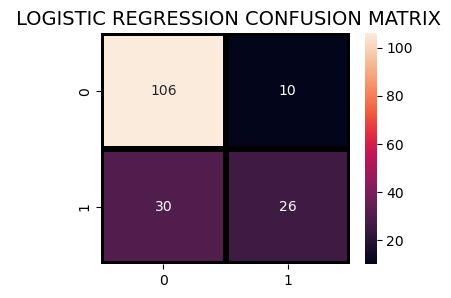

In [109]:

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [111]:


encoder = LabelEncoder()
y_training_encoded = encoder.fit_transform(y_train)
y_testing_encoded = encoder.transform(y_test)

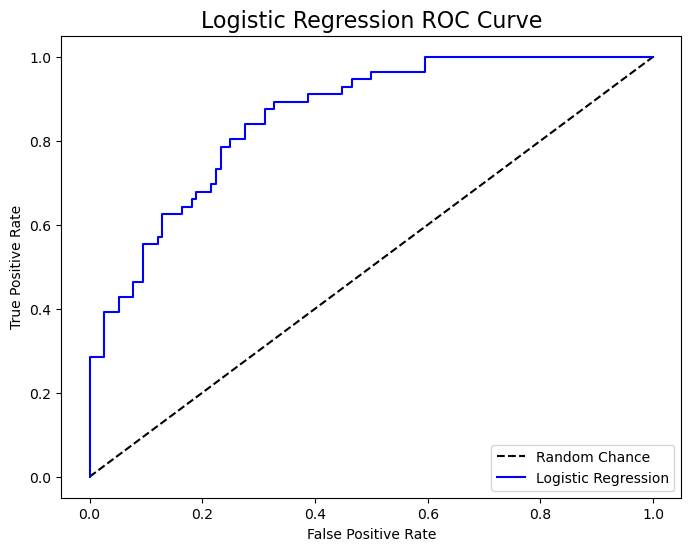

In [113]:
# Predict probabilities for the positive class with Logistic Regression
y_log_reg_pred_prob = best_log_reg.predict_proba(X_test)[:, 1]

# Compute the ROC curve metrics for Logistic Regression
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_testing_encoded, y_log_reg_pred_prob)

# Plotting the ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')  # Plot the diagonal line
plt.plot(fpr_log_reg, tpr_log_reg, label='Logistic Regression', color="b")  # Plot the ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()


In [117]:
#cross validation for naive bayes



# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Perform 5-fold cross-validation and compute the accuracy
scores = cross_val_score(gnb, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy scores for each fold:", scores)

# Print the mean and standard deviation of the scores
print("Mean accuracy: {:.2f}".format(scores.mean()))
print("Standard deviation: {:.2f}".format(scores.std()))

Accuracy scores for each fold: [0.7961165  0.74757282 0.7961165  0.75728155 0.76470588]
Mean accuracy: 0.77
Standard deviation: 0.02


In [ ]:
model = GaussianNB()  # Using GaussianNB as an example
model.fit(X_train, X_train)

In [118]:
predictions = model.predict(X_test)


In [119]:
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.7732558139534884
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       116
           1       0.71      0.52      0.60        56

    accuracy                           0.77       172
   macro avg       0.75      0.71      0.72       172
weighted avg       0.77      0.77      0.76       172



In [120]:
#hyperparameter tuning for gnb


# Define the parameter grid to search
param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit it to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Optionally, use the best estimator to make predictions
best_gnb = grid_search.best_estimator_
predictions = best_gnb.predict(X_test)

# Evaluate the predictions, e.g., by accuracy or another metric

print("Test set accuracy:", accuracy_score(y_test, predictions))

print(classification_report(y_test, predictions))

Best parameters: {'var_smoothing': 0.0006579332246575676}
Best score: 0.77822196839901
Test set accuracy: 0.7558139534883721
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       116
           1       0.66      0.52      0.58        56

    accuracy                           0.76       172
   macro avg       0.72      0.69      0.70       172
weighted avg       0.75      0.76      0.75       172



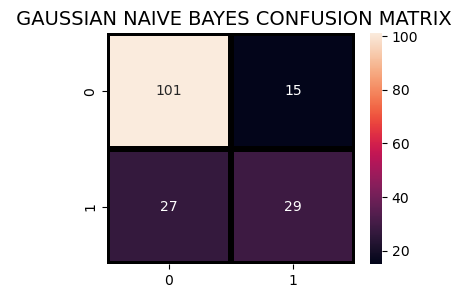

In [121]:

plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" GAUSSIAN NAIVE BAYES CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
#random forest


